# Petrophysical and statistical analysis of Brewster Member reservoir zone.

Here is a concise, point-wise outline for a case study on the Brewster Member Upper Volcano Formation, covering the necessary steps for quality control, zone identification, and reservoir characterization:

1. Quality Control of Log Data

Validate log data for consistency and accuracy.

2. Zone Identification

Gas-Bearing Zones: Identified by high resistivity and low neutron-density crossover.
Oil-Bearing Zones: Indicated by moderate to high resistivity, low water saturation, and minimal shale content.
Water-Bearing Zones: Characterized by low resistivity and high water saturation.

3. Total Porosity Calculation

Utilize density and neutron logs to calculate total porosity.
Apply corrections for shale content to derive effective porosity.

4. Compressional and Shear Wave Velocity Analysis

Extract compressional (Vp) and shear wave (Vs) velocities from sonic logs.
Analyze Vp/Vs ratio to distinguish lithologies and fluid types.

5. Volume of Shale Calculation

Use gamma-ray log to compute the volume of shale (Vsh).
Apply methods like the Larionov or Clavier correction for Vsh estimation in complex lithologies.

6. Water Saturation Calculation

Determine water saturation (Sw) using Archie's equation.
Apply different saturation models (e.g., Simandoux, Indonesia model) for shaly-sand formations.
Integrate resistivity and porosity logs to enhance Sw calculation accuracy.

7. Reservoir Zone Identification

Apply cut-off values for Sw, and Vsh to distinguish reservoir from non-reservoir zones.

8. Statistical Analysis in Identified Reservoir Zones

Perform statistical analysis (mean, median, standard deviation) of Sw, Vsh, and total porosity.
Conduct probabilistic assessments to quantify uncertainty and reservoir quality.
Use histograms, cumulative frequency plots, and box plots for data visualization and interpretation.

9. Conclusions

Summarize findings on reservoir quality, hydrocarbon potential, and zonal distribution.
Provide recommendations for further appraisal, development planning, or enhanced recovery techniques.
This structured approach ensures a comprehensive understanding of the Brewster Member Upper Volcano Formation, optimizing reservoir characterization and decision-making.

In [14]:
# input las file

import numpy as np
import matplotlib.pyplot as plt
import lasio
import seaborn as sns
las=lasio.read(r"C:\Users\RAJKUMAR MONDAL\OneDrive\Books and notes all sem\well log\log data for case study\IchthysDeep-1_client_edit.las")
las1=lasio.read(r"C:\Users\RAJKUMAR MONDAL\OneDrive\Books and notes all sem\well log\log data for case study\Ichthys_Deep_1_LCAL_GRonly_Run2_036PUP.las")
las2=lasio.read(r"C:\Users\RAJKUMAR MONDAL\OneDrive\Books and notes all sem\well log\log data for case study\ichthys_deep_1_wire_public_2010_sdb.las")


las having information of NPHI, RHOM, AFRT, AFRX logs.
las1 having LCAL and GR logs.
las2 having DTCO & DTSM logs.

In [9]:
# curves information like which are the logs were recorded
print(las.curves)

Mnemonic  Unit  Value  Description                                                                          
--------  ----  -----  -----------                                                                          
DEPT      M            0       Index                                                                        
HFK       %            1       HNGS Formation Potassium Concentration                                       
HSGR      GAPI         2       HNGS Standard Gamma-Ray                                                      
HCGR      GAPI         3       HNGS Computed Gamma-Ray                                                      
HUPR                   4       HNGS Uranium/Potassium Ratio                                                 
HTUR                   5       HNGS Thorium/Uranium Ratio                                                   
HTPR                   6       HNGS Thorium/Potassium Ratio                                                 
HURA      PPM      

In [10]:
# las file converted into data frame

df=las.df().reset_index()
df.head()

,DEPT,HFK,HSGR,HCGR,HUPR,HTUR,HTPR,HURA,HTHO,LCAL:1,...,AE20,AE30,AE60,AE90,AE10,AT10,AT20,AT30,AT60,AT90
0,4969.6120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4969.5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4969.4596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4969.3834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4969.3072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
## las1 file converted into data frame

df1=las1.df().reset_index()
df1.head()

,DEPT,LCAL,GR
0,4859.4264,8.627,130.9205
1,4859.2740,8.627,130.9205
2,4859.1216,8.627,130.9205
3,4858.9692,8.627,130.9205
4,4858.8168,8.627,130.9205


In [17]:
## las2 file converted into data frame

df2=las2.df().reset_index()
df2.head()

,DEPTH,AFEC,ANEC,APLC,BS,CALI,DENS,DENSC,DRH,DT,...,PR,PR_C,RESD,RESM,RESS,RHOM,SIGF,TENS,VPVS,VPVS_C
0,233.1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,233.3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,233.4768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,233.6292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,233.7816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## our zone of interest in between 4074.5 m to 4242.9

data=df[(df["DEPT"]>=4074.5) & (df["DEPT"]<=4242.9)]
data1=df1[(df1["DEPT"]>=4074.5) & (df1["DEPT"]<=4242.9)]
data2=df2[(df2["DEPTH"]>=4074.5) & (df2["DEPTH"]<=4242.9)]

Matrix coorrection on porosity:
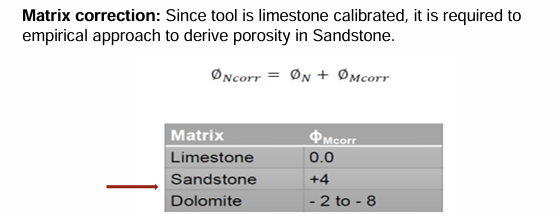

In [13]:
## matrix correction for limestone calibrated porosity data , here it is corrected for sandstone matrix 

NPHI=(data.APLC+.04)

# Outliers detection 

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_22924\986212301.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)


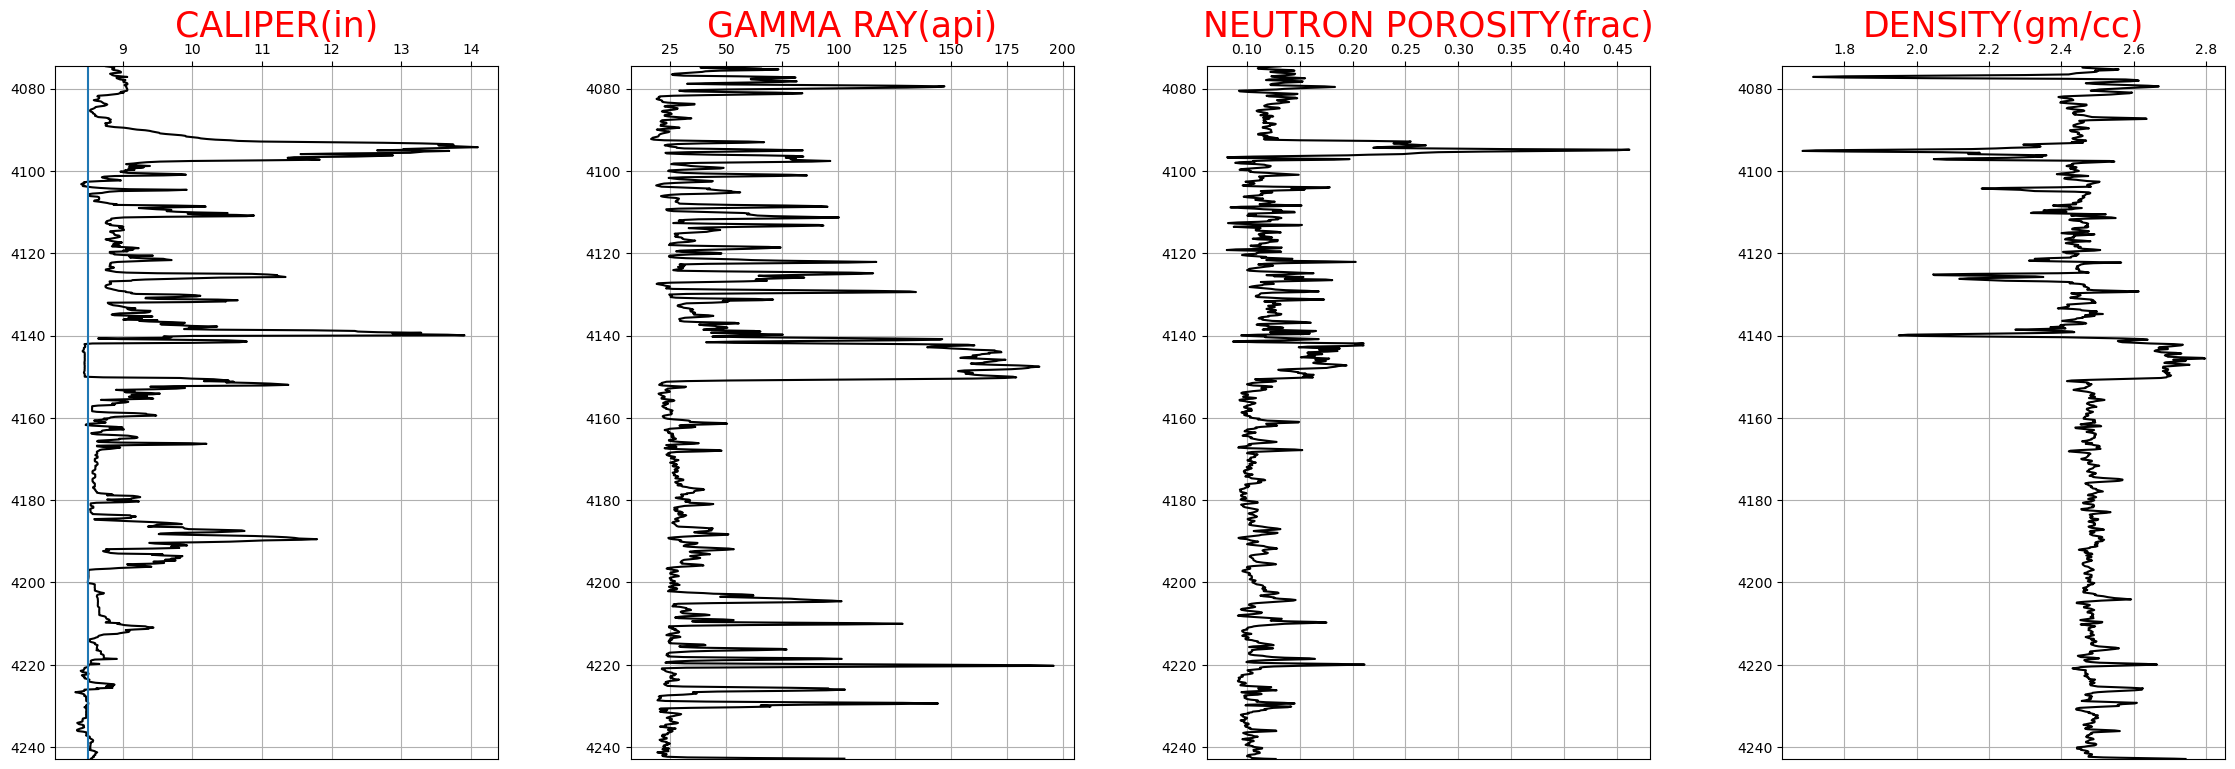

In [20]:
fig=plt.subplots(figsize=(28,9))
plt.subplots_adjust(wspace=0.3)
data2=df2[(df2["DEPTH"]>=4074.5) & (df2["DEPTH"]<=4242.9)]
data1=df1[(df1["DEPT"]>=4074.5) & (df1["DEPT"]<=4242.9)]
ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax3=plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax4=plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)



ax1.plot(data1.LCAL,data1.DEPT,color="black")
ax1.set_ylim(4242.9,4074.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.axvline(8.5)
ax1.set_xlabel("CALIPER(in)",color="red",fontsize=25)
ax1.grid()

ax2.plot(data1.GR,data1.DEPT,color="black")
ax2.set_ylim(4242.9,4074.5)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("GAMMA RAY(api)",color="red",fontsize=25)
ax2.grid()

ax3.plot(NPHI,data.DEPT,color="black")
ax3.set_ylim(4242.9,4074.5)
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("NEUTRON POROSITY(frac)",color="red",fontsize=25)
ax3.grid()

ax4.plot(data.RHOM,data.DEPT,color="black")
ax4.set_ylim(4242.9,4074.5)
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.set_xlabel("DENSITY(gm/cc)",color="red",fontsize=25)
ax4.grid()



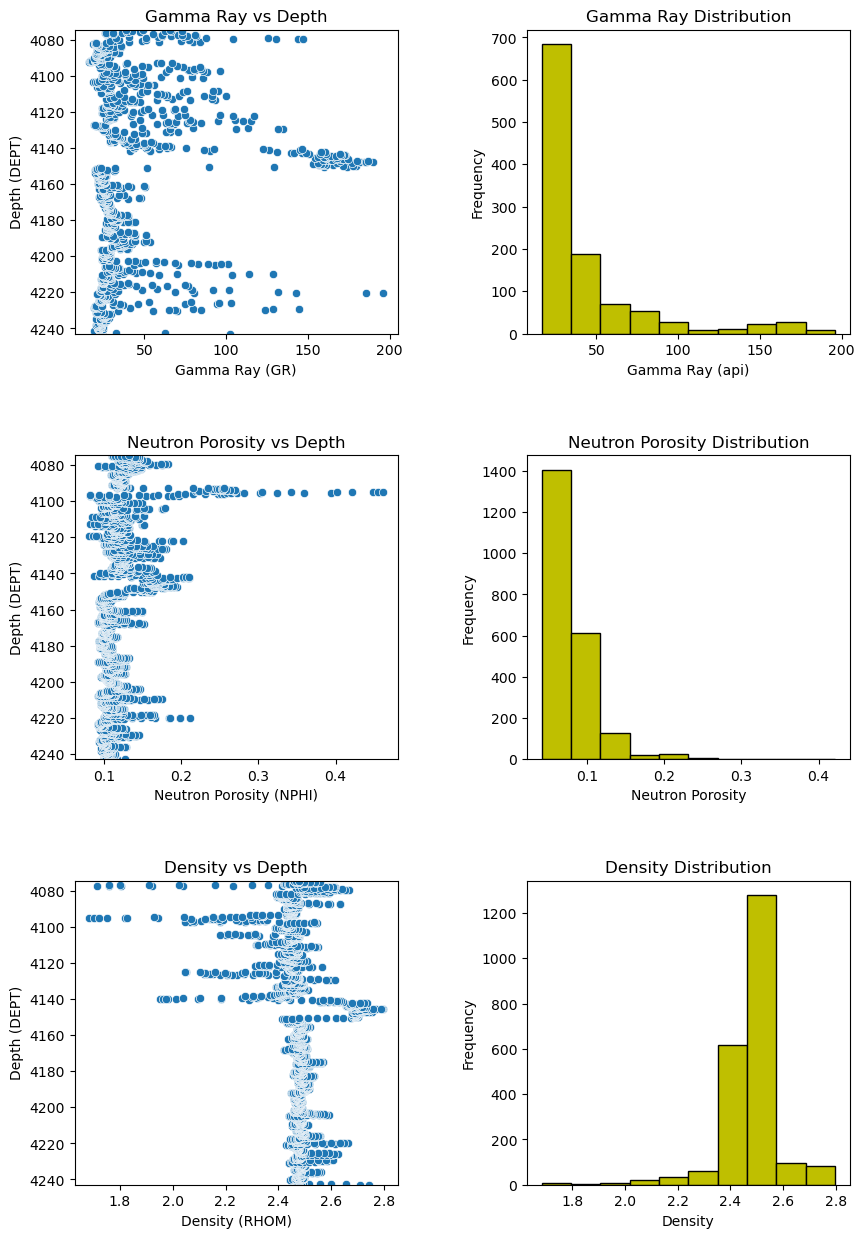

In [24]:
# Adjust the number of subplots based on the number of scatter plots and histograms you want to display.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Plot 1: Gamma Ray (GR) vs. Depth scatter plot
sns.scatterplot(x=data1.GR, y=data1.DEPT, ax=axes[0, 0])
axes[0, 0].set_ylim(4242.9, 4074.5)
axes[0, 0].set_title('Gamma Ray vs Depth')
axes[0, 0].set_xlabel('Gamma Ray (GR)')
axes[0, 0].set_ylabel('Depth (DEPT)')

# Plot 2: Gamma Ray Histogram
data1.GR.plot(kind="hist", edgecolor="k", color="y", ax=axes[0, 1])
axes[0, 1].set_xlabel('Gamma Ray (api)')
axes[0, 1].set_title('Gamma Ray Distribution')

# Plot 3: Neutron Porosity (NPHI) vs. Depth scatter plot
sns.scatterplot(x=NPHI, y=data.DEPT, ax=axes[1, 0])
axes[1, 0].set_ylim(4242.9, 4074.5)
axes[1, 0].set_title('Neutron Porosity vs Depth')
axes[1, 0].set_xlabel('Neutron Porosity (NPHI)')
axes[1, 0].set_ylabel('Depth (DEPT)')

# Plot 4: Neutron Porosity Histogram
data.APLC.plot(kind="hist", edgecolor="k", color="y", ax=axes[1, 1])
axes[1, 1].set_xlabel('Neutron Porosity')
axes[1, 1].set_title('Neutron Porosity Distribution')

# Plot 5: Density (RHOM) vs. Depth scatter plot
sns.scatterplot(x=data.RHOM, y=data.DEPT, ax=axes[2, 0])
axes[2, 0].set_ylim(4242.9, 4074.5)
axes[2, 0].set_title('Density vs Depth')
axes[2, 0].set_xlabel('Density (RHOM)')
axes[2, 0].set_ylabel('Depth (DEPT)')

# Plot 6: Density Histogram
data.RHOM.plot(kind="hist", edgecolor="k", color="y", ax=axes[2, 1])
axes[2, 1].set_xlabel('Density')
axes[2, 1].set_title('Density Distribution')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()


C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_22924\974826273.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


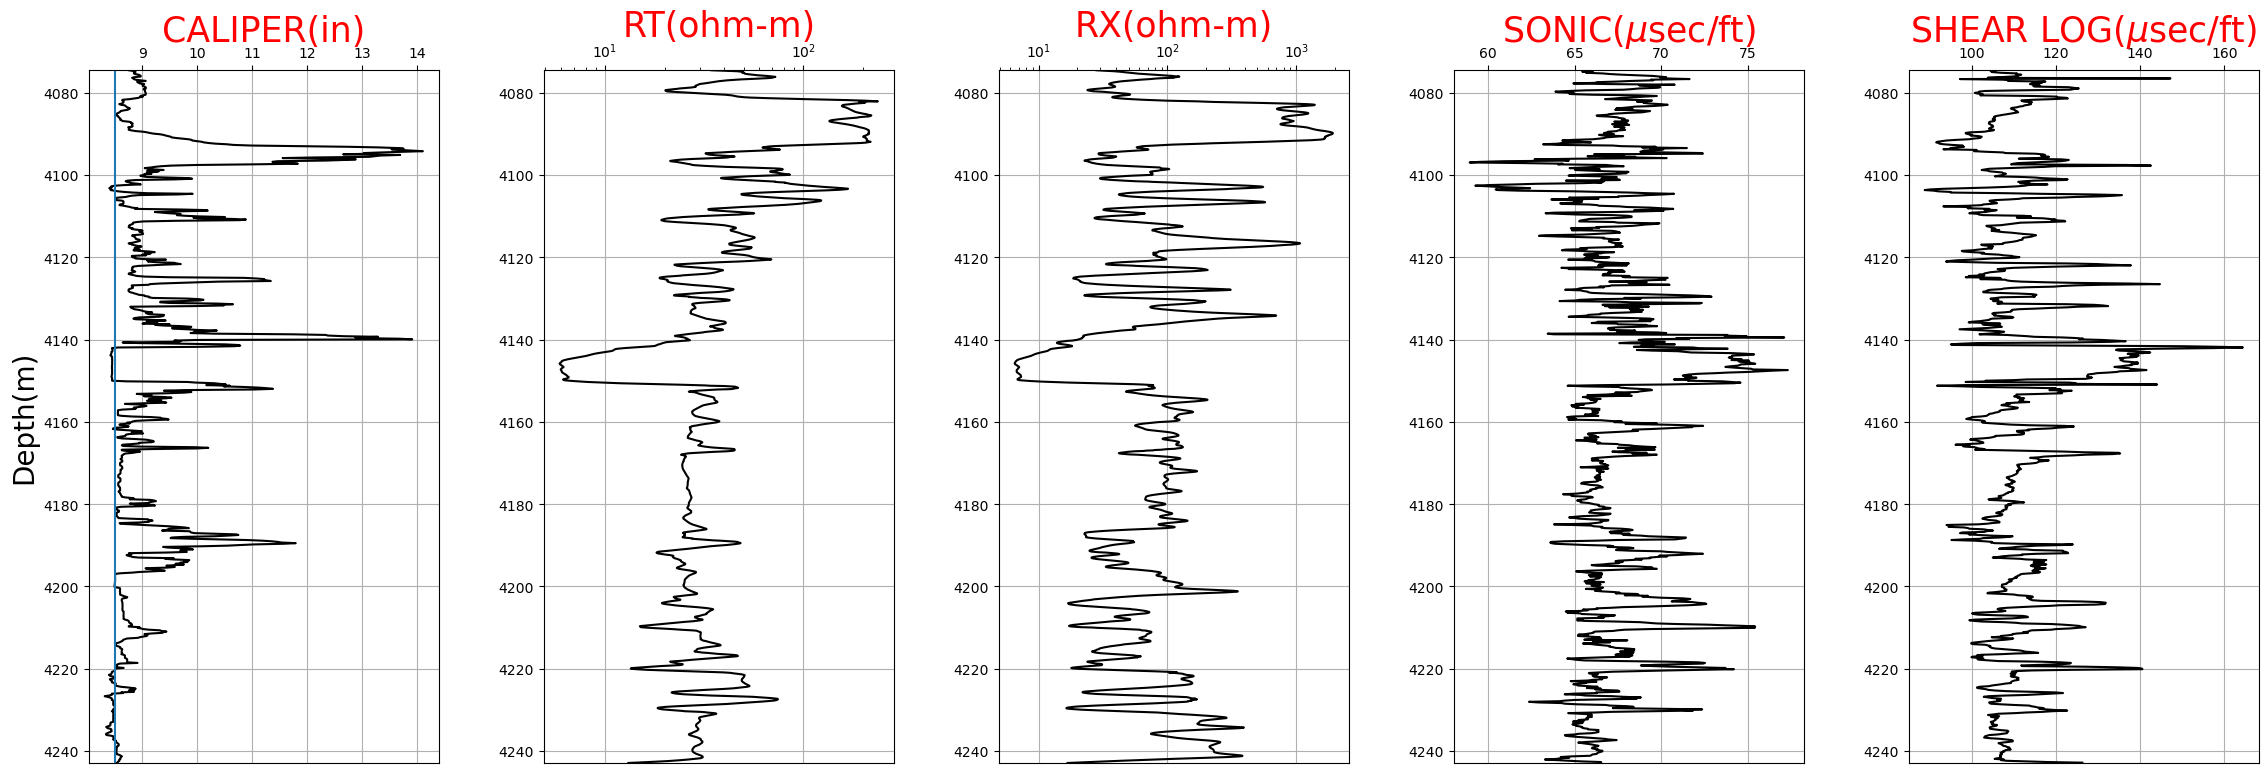

In [21]:
fig=plt.subplots(figsize=(28,9))
plt.subplots_adjust(wspace=0.3)
ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax5=plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax6=plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax7=plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax8=plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot(data1.LCAL,data1.DEPT,color="black")
ax1.set_ylim(4242.9,4074.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.axvline(8.5)
ax1.set_xlabel("CALIPER(in)",color="red",fontsize=25)
ax1.set_ylabel('Depth(m)',fontsize=20)
ax1.grid()

ax5.plot(data.AFRT,data.DEPT,color="black")
ax5.set_ylim(4242.9,4074.5)
ax5.semilogx()
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.set_xlabel("RT(ohm-m)",color="red",fontsize=25)
ax5.grid()

ax6.plot(data.AFRX,data.DEPT,color="black")
ax6.set_ylim(4242.9,4074.5)
ax6.semilogx()
ax6.xaxis.set_label_position("top")
ax6.xaxis.set_ticks_position("top")
ax6.set_xlabel("RX(ohm-m)",color="red",fontsize=25)
ax6.grid()

ax7.plot(data2.DTCO,data2.DEPTH,color="black")
ax7.set_ylim(4242.9,4074.5)
ax7.xaxis.set_label_position("top")
ax7.xaxis.set_ticks_position("top")
ax7.set_xlabel("SONIC($\mu$sec/ft)",color="red",fontsize=25)
ax7.grid()

ax8.plot(data2.DTSM_C,data2.DEPTH,color="black")
ax8.set_ylim(4242.9,4074.5)
ax8.xaxis.set_label_position("top")
ax8.xaxis.set_ticks_position("top")
ax8.set_xlabel("SHEAR LOG($\mu$sec/ft)",color="red",fontsize=25)
ax8.grid()

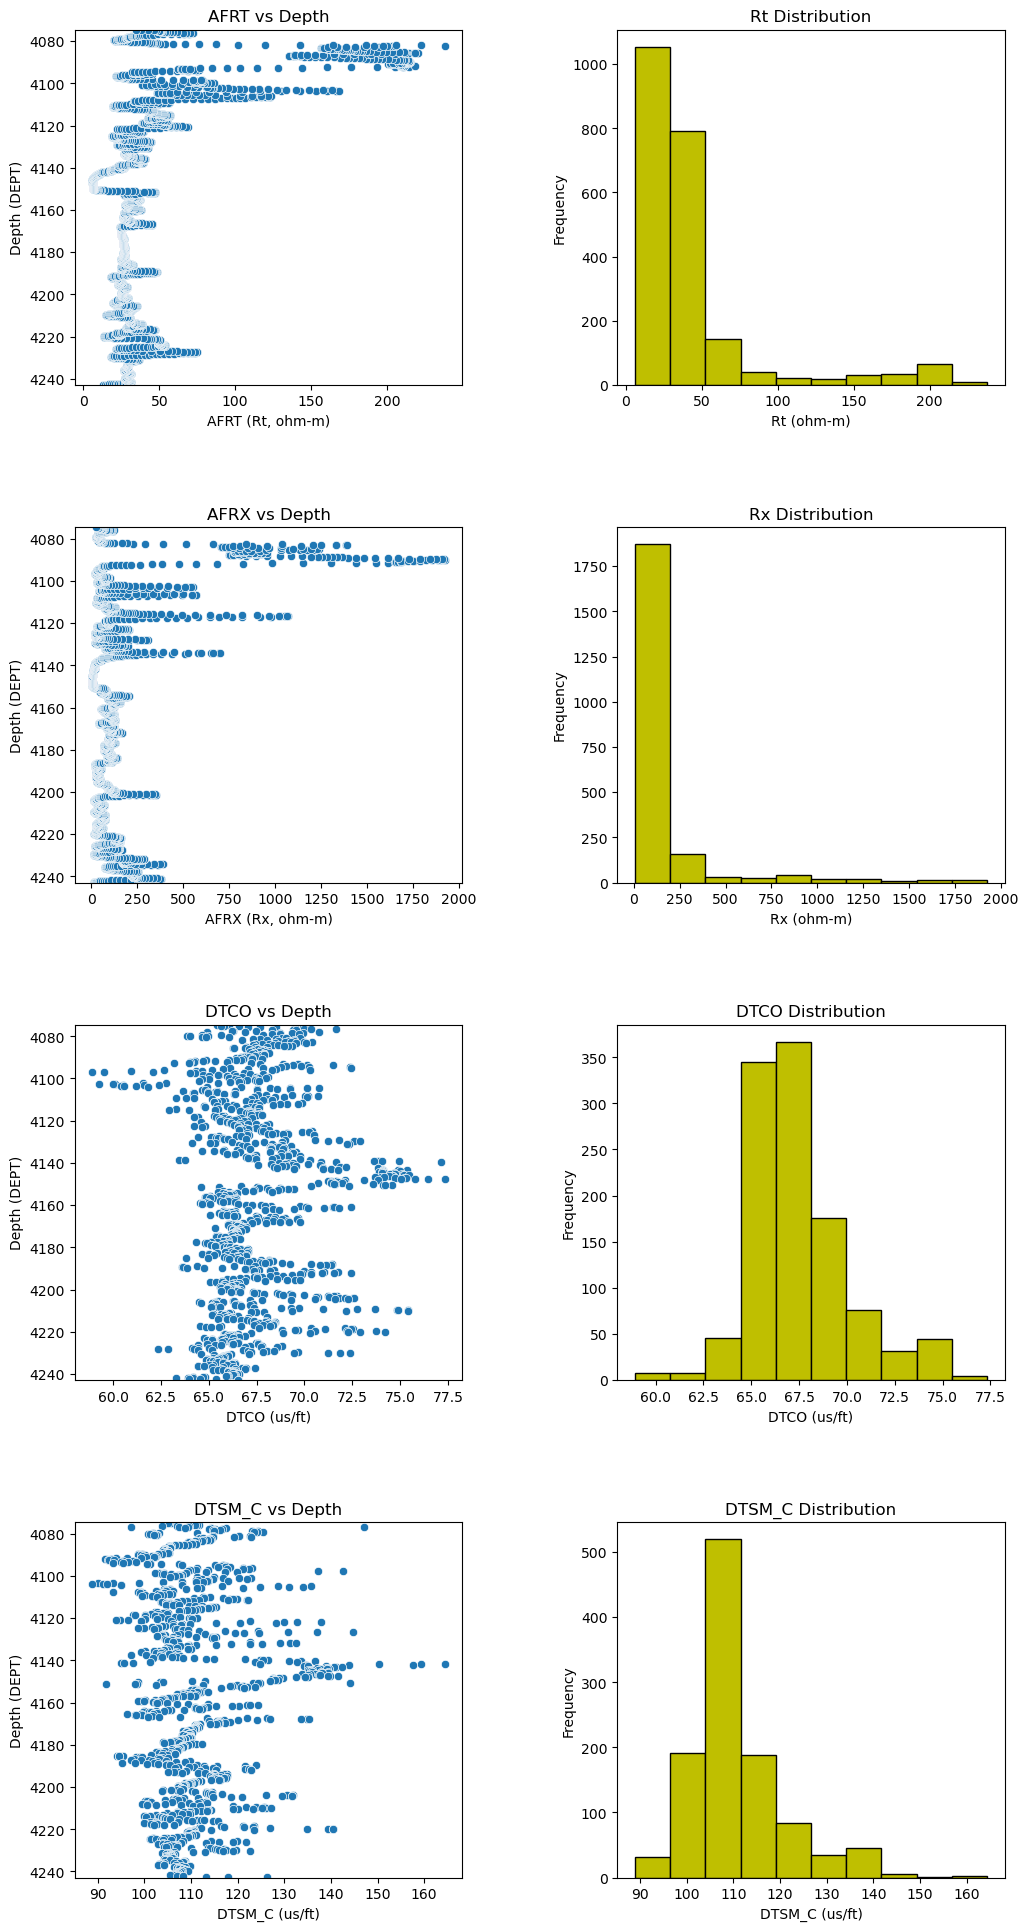

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 24))

# Plot 1: AFRT vs. Depth scatter plot
sns.scatterplot(x=data.AFRT, y=data.DEPT, ax=axes[0, 0])
axes[0, 0].set_ylim(4242.9, 4074.5)
axes[0, 0].set_title('AFRT vs Depth')
axes[0, 0].set_xlabel('AFRT (Rt, ohm-m)')
axes[0, 0].set_ylabel('Depth (DEPT)')

# Plot 2: AFRT Histogram
data.AFRT.plot(kind="hist", edgecolor="k", color="y", ax=axes[0, 1])
axes[0, 1].set_xlabel('Rt (ohm-m)')
axes[0, 1].set_title('Rt Distribution')

# Plot 3: AFRX vs. Depth scatter plot
sns.scatterplot(x=data.AFRX, y=data.DEPT, ax=axes[1, 0])
axes[1, 0].set_ylim(4242.9, 4074.5)
axes[1, 0].set_title('AFRX vs Depth')
axes[1, 0].set_xlabel('AFRX (Rx, ohm-m)')
axes[1, 0].set_ylabel('Depth (DEPT)')

# Plot 4: AFRX Histogram
data.AFRX.plot(kind="hist", edgecolor="k", color="y", ax=axes[1, 1])
axes[1, 1].set_xlabel('Rx (ohm-m)')
axes[1, 1].set_title('Rx Distribution')

# Plot 5: DTCO vs. Depth scatter plot
sns.scatterplot(x=data2.DTCO, y=data2.DEPTH, ax=axes[2, 0])
axes[2, 0].set_ylim(4242.9, 4074.5)
axes[2, 0].set_title('DTCO vs Depth')
axes[2, 0].set_xlabel('DTCO (us/ft)')
axes[2, 0].set_ylabel('Depth (DEPT)')

# Plot 6: DTCO Histogram
data2.DTCO.plot(kind="hist", edgecolor="k", color="y", ax=axes[2, 1])
axes[2, 1].set_xlabel('DTCO (us/ft)')
axes[2, 1].set_title('DTCO Distribution')

# Plot 7: DTSM_C vs. Depth scatter plot
sns.scatterplot(x=data2.DTSM_C, y=data2.DEPTH, ax=axes[3, 0])
axes[3, 0].set_ylim(4242.9, 4074.5)
axes[3, 0].set_title('DTSM_C vs Depth')
axes[3, 0].set_xlabel('DTSM_C (us/ft)')
axes[3, 0].set_ylabel('Depth (DEPT)')

# Plot 8: DTSM_C Histogram
data2.DTSM_C.plot(kind="hist", edgecolor="k", color="y", ax=axes[3, 1])
axes[3, 1].set_xlabel('DTSM_C (us/ft)')
axes[3, 1].set_title('DTSM_C Distribution')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()


# Zone identification 

Density porosity calculation formula:
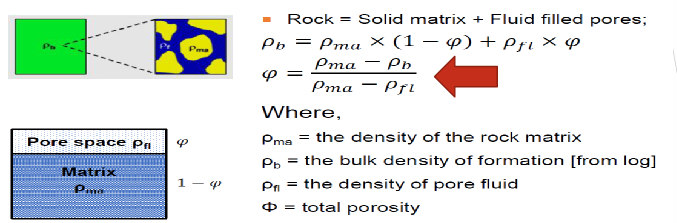

In [27]:
#Density porosity calculation

def den_por(ma,bu,fg):
    return ((ma-bu)/(ma-fg))
x=den_por(2.65,data.RHOM,0.2)

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_22924\45639303.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)


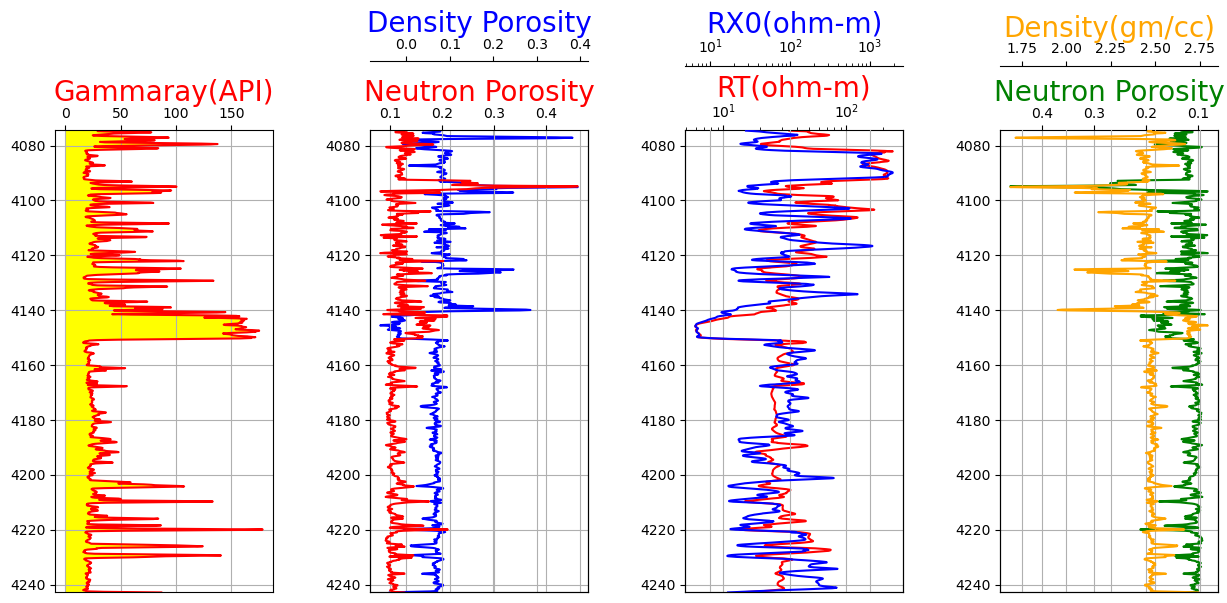

In [29]:

fig=plt.subplots(figsize=(15,6))
plt.subplots_adjust(wspace=.45)



ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax3=ax2.twiny()
ax4=plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax5=ax4.twiny()
ax6=plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)
ax7=ax6.twiny()


ax3.plot(NPHI,data.DEPT,color="red")
ax3.set_ylim(4242.9,4074.5)
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("Neutron Porosity",color="red",fontsize=20)
ax3.grid()

ax2.plot(x,data.DEPT,color="blue")
ax2.set_ylim(4242.9,4074.5)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("Density Porosity",color="blue",fontsize=20)
ax2.spines["top"].set_position(("axes",1.15))
ax2.grid()

ax1.plot(data.HSGR,data.DEPT,color="red")
ax1.set_ylim(4242.9,4074.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.set_xlabel("Gammaray(API)",color="red",fontsize=20)
ax1.fill_betweenx(data.DEPT,0,data.HSGR,facecolor="yellow")
ax1.grid()

ax4.plot(data.AFRT,data.DEPT,color="red")
ax4.set_ylim(4242.9,4074.5)
ax4.semilogx()
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.set_xlabel("RT(ohm-m)",color="red",fontsize=20)
ax4.grid()

ax5.plot(data.AFRX,data.DEPT,color="blue")
ax5.set_ylim(4242.9,4074.5)
ax5.semilogx()
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.set_xlabel("RX0(ohm-m)",color="blue",fontsize=20)
ax5.spines["top"].set_position(("axes",1.14))
ax5.grid()

ax6.plot(NPHI,data.DEPT,color="green")
ax6.set_ylim(4242.9,4074.5)
ax6.xaxis.set_label_position("top")
ax6.xaxis.set_ticks_position("top")
ax6.set_xlabel("Neutron Porosity",color="green",fontsize=20)
ax6.invert_xaxis()
ax6.grid()

ax7.plot(data.RHOM,data.DEPT,color="orange")
ax7.set_ylim(4242.9,4074.5)
ax7.xaxis.set_label_position("top")
ax7.xaxis.set_ticks_position("top")
ax7.set_xlabel("Density(gm/cc)",color="orange",fontsize=20)
ax7.spines["top"].set_position(("axes",1.14))
ax7.grid()




Since zone is filled with gas interpretd from the above Triple plot then the formula:
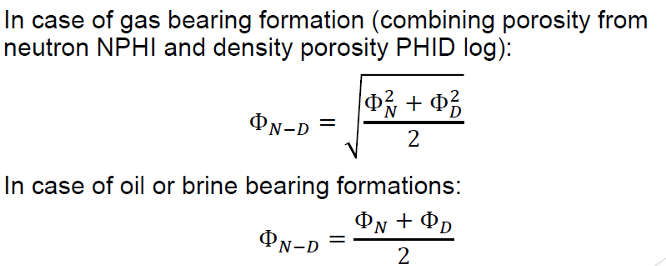

In [30]:
## Total Porosity calculation and plot along with all the plots
total_por=np.sqrt(((NPHI**2)+(x**2))/2)

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_22924\1481583964.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


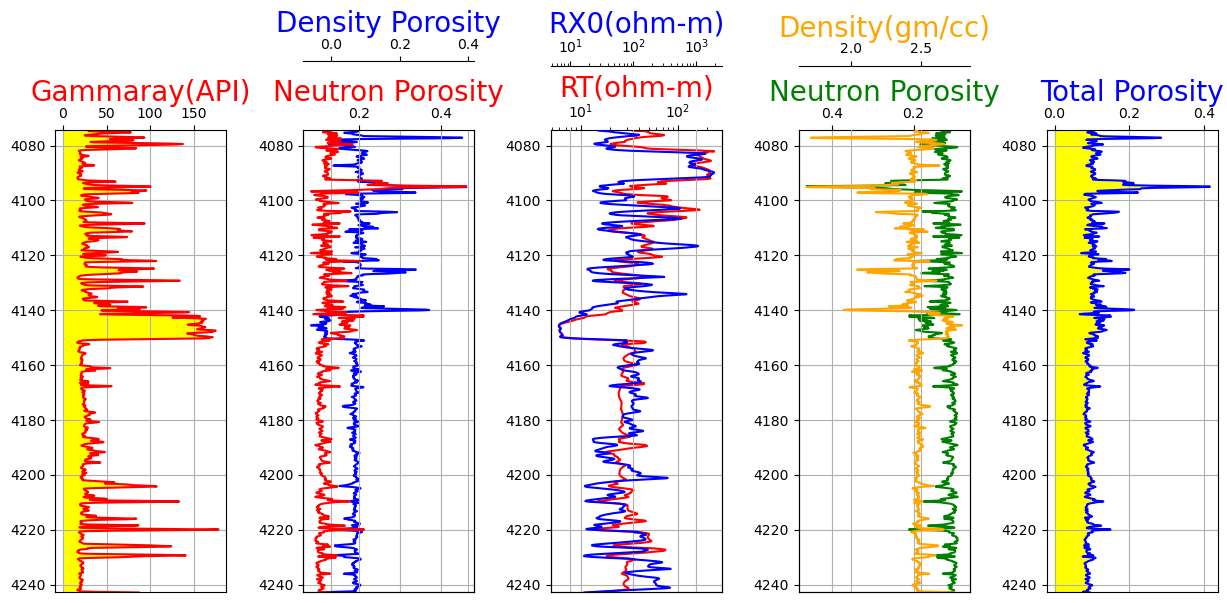

In [32]:
fig=plt.subplots(figsize=(15,6))
plt.subplots_adjust(wspace=.45)


total_por=np.sqrt(((NPHI**2)+(x**2))/2)
ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3=ax2.twiny()
ax4=plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5=ax4.twiny()
ax6=plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7=ax6.twiny()
ax8=plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax3.plot(NPHI,data.DEPT,color="red")
ax3.set_ylim(4242.9,4074.5)
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("Neutron Porosity",color="red",fontsize=20)
ax3.grid()

ax2.plot(x,data.DEPT,color="blue")
ax2.set_ylim(4242.9,4074.5)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("Density Porosity",color="blue",fontsize=20)
ax2.spines["top"].set_position(("axes",1.15))
ax2.grid()

ax1.plot(data.HSGR,data.DEPT,color="red")
ax1.set_ylim(4242.9,4074.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.set_xlabel("Gammaray(API)",color="red",fontsize=20)
ax1.fill_betweenx(data.DEPT,0,data.HSGR,facecolor="yellow")
ax1.grid()

ax4.plot(data.AFRT,data.DEPT,color="red")
ax4.set_ylim(4242.9,4074.5)
ax4.semilogx()
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.set_xlabel("RT(ohm-m)",color="red",fontsize=20)
ax4.grid()

ax5.plot(data.AFRX,data.DEPT,color="blue")
ax5.set_ylim(4242.9,4074.5)
ax5.semilogx()
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.set_xlabel("RX0(ohm-m)",color="blue",fontsize=20)
ax5.spines["top"].set_position(("axes",1.14))
ax5.grid()

ax6.plot(NPHI,data.DEPT,color="green")
ax6.set_ylim(4242.9,4074.5)
ax6.xaxis.set_label_position("top")
ax6.xaxis.set_ticks_position("top")
ax6.set_xlabel("Neutron Porosity",color="green",fontsize=20)
ax6.invert_xaxis()
ax6.grid()

ax7.plot(data.RHOM,data.DEPT,color="orange")
ax7.set_ylim(4242.9,4074.5)
ax7.xaxis.set_label_position("top")
ax7.xaxis.set_ticks_position("top")
ax7.set_xlabel("Density(gm/cc)",color="orange",fontsize=20)
ax7.spines["top"].set_position(("axes",1.14))
ax7.grid()

ax8.plot(total_por,data.DEPT,color="blue")
ax8.set_ylim(4242.9,4074.5)
ax8.xaxis.set_label_position("top")
ax8.xaxis.set_ticks_position("top")
ax8.set_xlabel("Total Porosity",color="blue",fontsize=20)
ax8.grid()
plt.fill_betweenx(data.DEPT,0,total_por,facecolor="yellow")

plt.show()

#  Compressional and Shear wave velocity analysis

In [33]:
## Vp and Vs calculation from the DTCO and DTSM in the data2 in m/s

Vp=304800/data2.DTCO
Vs=304800/data2.DTSM_C

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_22924\1563588273.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


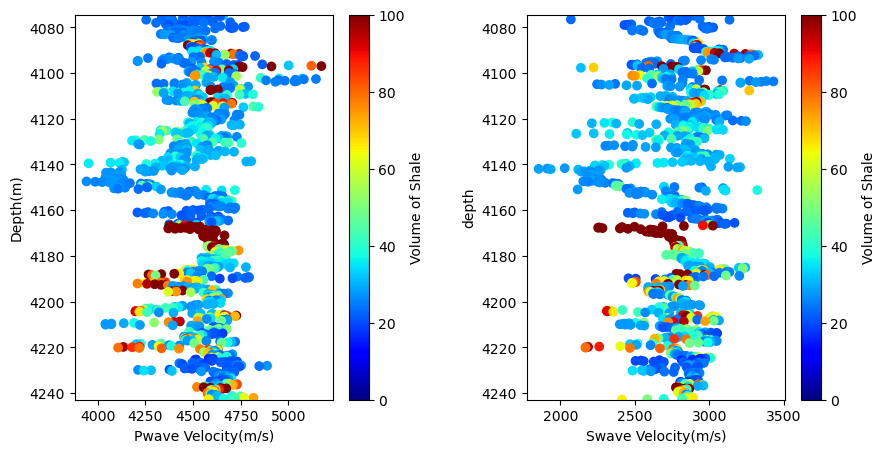

In [35]:
## VIsualisation of Vp

plt.subplots(figsize=(10,5))
plt.subplots_adjust(wspace=0.4)

plt.subplot(121)
plt.scatter(x=Vp,y=data2.DEPTH,c=data1.GR,vmin=0,vmax=100,cmap='jet')
plt.colorbar(label="Volume of Shale")
plt.ylim(4242.9,4074.5)
plt.xlabel("Pwave Velocity(m/s)")
plt.ylabel("Depth(m)")

plt.subplot(122)
plt.scatter(x=Vs,y=data2.DEPTH,c=data1.GR,vmin=0,vmax=100,cmap='jet')
plt.colorbar(label="Volume of Shale")
plt.ylim(4242.9,4074.5)
plt.xlabel("Swave Velocity(m/s)")
plt.ylabel("depth")

plt.show()

# Volume of shale calculation 

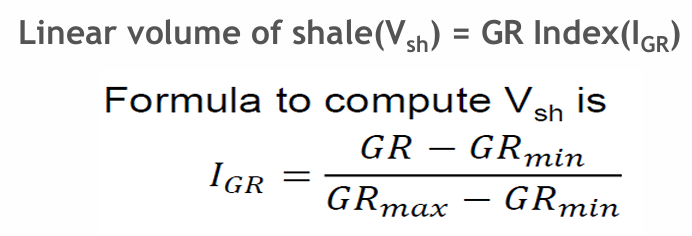

26.262659999999997 140.65254199999998


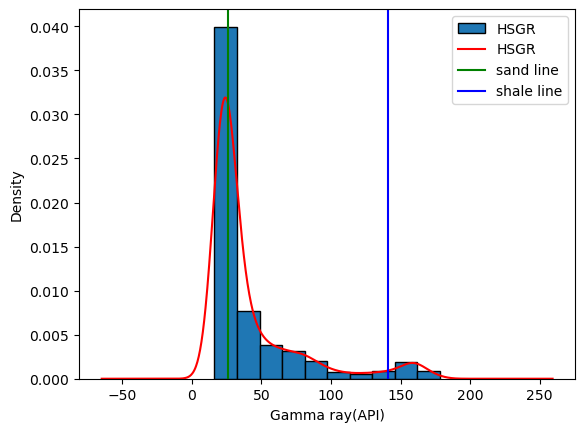

In [38]:
## find out GR_min and GR_max as sandline and shale line

data.HSGR.plot(kind="hist",edgecolor="black",density=True)
data.HSGR.plot(kind="kde",color="red")
p5=data.HSGR.quantile(0.5)
p95=data.HSGR.quantile(0.95)
print(p5,p95)
plt.axvline(p5,label="sand line",color="green")
plt.axvline(p95,label="shale line",color="blue")
plt.xlabel("Gamma ray(API)")

plt.legend()
plt.show()

In [39]:
## Volume of shale calculation

def vsh(gr_min,gr_max,gr_log):
    return((gr_log-gr_min)/(gr_max-gr_min))
x1=vsh(26.262659999999997,140.65254199999998,data.HSGR)

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_22924\9294655.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)


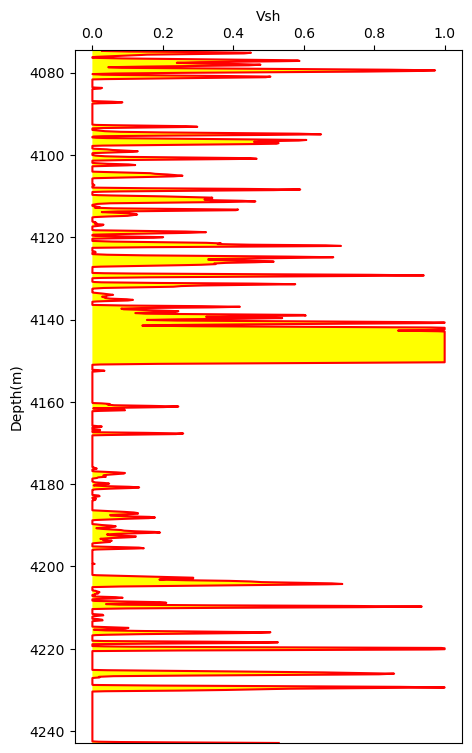

In [41]:
plt.subplots(figsize=(5,9))

for i in range(9537,11746):
    if x1[i] < 0:
        x1[i]=0
    if x1[i] > 1:
        x1[i] = 1
#rt=1/np.sqrt(data.AFRT)
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax.plot(x1,data.DEPT,color="red")
#p=np.polyfit(rt,NPHI,1)
ax.set_xlabel("Vsh")
ax.set_ylabel("Depth(m)")
ax.set_ylim(4242.9,4074.5)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.fill_betweenx(data.DEPT,0,x1,facecolor="yellow")

    
plt.show()


#  Water saturation calculation

Most of the part in the selected depth interval is made of sediment rock and that is why i used archie's equation.
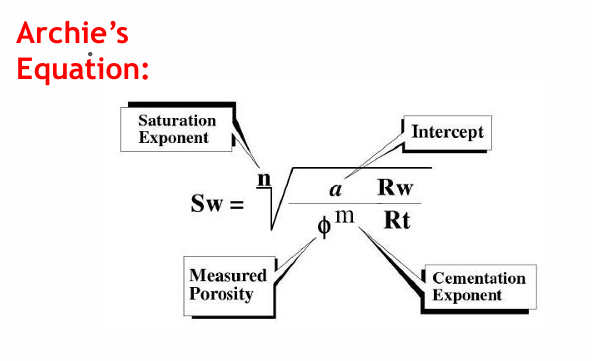

Here i take n=2,a=1,m=2,and Rw=0.08(from well compliation report). Rw can calculate using Picket plot and few more process are available in literature. 

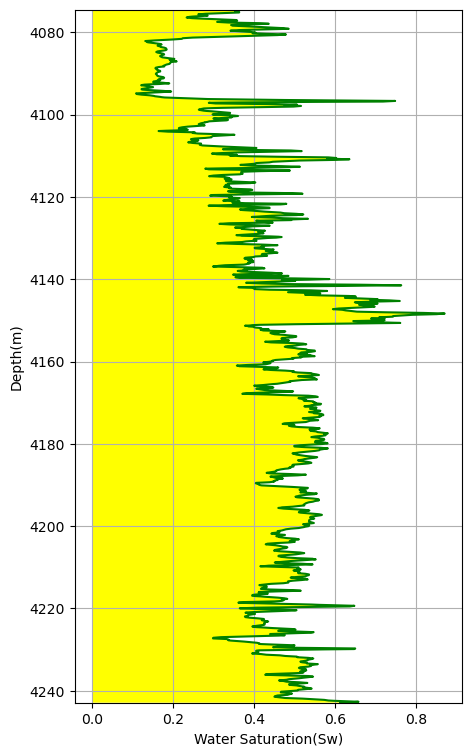

In [43]:
## Calculation of Sw and plot

plt.subplots(figsize=(5,9))
def sw_archie(Rw, Rt, PHI, a, m, n):
    Swa =((a * Rw)/((PHI**m)*Rt))**(1/n)
    return Swa
x4=sw_archie(0.08,data.AFRT,NPHI,1,2,2)
plt.plot(x4,data.DEPT,color="green")
plt.ylim(4242.9,4074.5)
plt.fill_betweenx(data.DEPT,0,x4,facecolor="yellow")
plt.xlabel("Water Saturation(Sw)")
plt.ylabel("Depth(m)")
plt.grid()

# Reservoir flag rise using cut off condition, that is Sw<=0.7 and Vsh<=0.4

whreever above codition is satisfies that zones becomes 1 otherwise it would be 0.

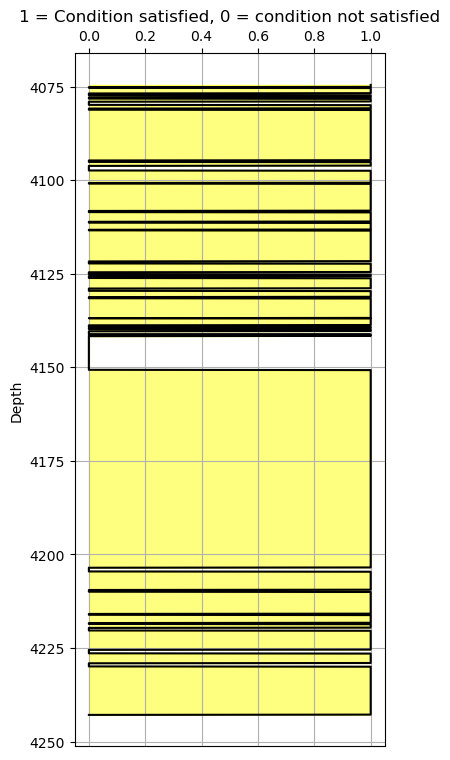

In [45]:
yes_no = np.zeros(2210)

for i in range(2210):
    if x1[i+9537] <=0.40:
        if x4[i+9537] <=0.70:
            yes_no[i]=1
        

plt.figure(1, figsize=(4,9))
ax = plt.gca()
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.invert_yaxis()
plt.grid()
plt.plot( yes_no,data.DEPT,color='black')
plt.ylabel("Depth")
plt.title("1 = Condition satisfied, 0 = condition not satisfied")
ax.fill_betweenx(data.DEPT,0,yes_no,color='yellow',alpha=.5)
plt.show()

Reservoir zone identification using water saturation, volume of shale and reservoir flag.

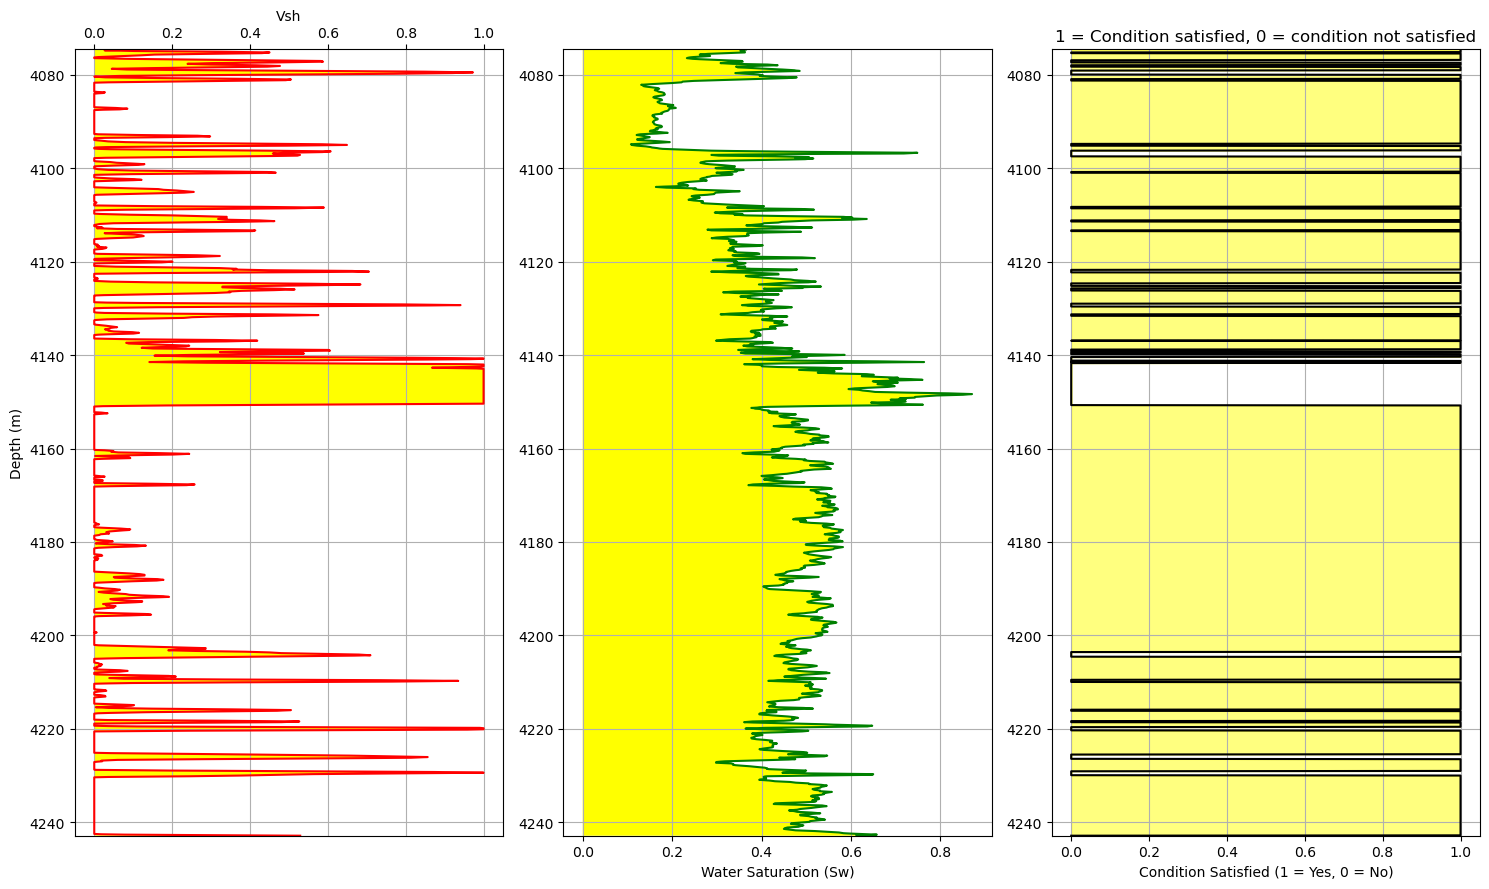

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 9))

# Plot 1: Vsh vs Depth
for i in range(9537, 11746):
    if x1[i] < 0:
        x1[i] = 0
    if x1[i] > 1:
        x1[i] = 1

ax1 = axes[0]
ax1.plot(x1, data.DEPT, color="red")
ax1.set_xlabel("Vsh")
ax1.set_ylabel("Depth (m)")
ax1.set_ylim(4242.9, 4074.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")

ax1.fill_betweenx(data.DEPT, 0, x1, facecolor="yellow")
ax1.grid()

# Plot 2: Water Saturation (Sw) vs Depth
def sw_archie(Rw, Rt, PHI, a, m, n):
    Swa = ((a * Rw) / ((PHI ** m) * Rt)) ** (1 / n)
    return Swa

x4 = sw_archie(0.08, data.AFRT, NPHI, 1, 2, 2)

ax2 = axes[1]
ax2.plot(x4, data.DEPT, color="green")
ax2.set_xlabel("Water Saturation (Sw)")
ax2.set_ylim(4242.9, 4074.5)
ax2.fill_betweenx(data.DEPT, 0, x4, facecolor="yellow")
ax2.grid()


# Plot 3: Condition Satisfied vs Depth
yes_no = np.zeros(2210)
for i in range(2210):
    if x1[i + 9537] <= 0.40 and x4[i + 9537] <= 0.70:
        yes_no[i] = 1

ax3 = axes[2]
ax3.plot(yes_no, data.DEPT, color='black')
ax3.set_xlabel("Condition Satisfied (1 = Yes, 0 = No)")
ax3.set_ylim(4242.9, 4074.5)

ax3.grid()
ax3.fill_betweenx(data.DEPT, 0, yes_no, color='yellow', alpha=0.5)
ax3.set_title("1 = Condition satisfied, 0 = condition not satisfied")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Statistical analysis of porosity, Vsh, and Sw of identifed reservoir zone.

Zone1: 4074.5 to  4135 m

In [51]:
## Statistical analysis of porosity in zone1

# Define Zone 1 based on the DEPT range
data4 = df[(df["DEPT"] >= 4074.5) & (df["DEPT"] <= 4135)] 





# Matrix correction on porosity in Zone 1
NPHI1 = data4.APLC + 0.04  

# Density porosity calculation function
def den_por(ma1, bu1, fg1):
    return (ma1 - bu1) / (ma1 - fg1)

# Calculate density porosity in Zone 1
x11 = den_por(2.65, data4.RHOM, 0.2)

# Total porosity calculation in Zone 1 using the geometric mean of neutron and density porosity
total_por1 = np.sqrt(((NPHI1 ** 2) + (x11 ** 2)) / 2)

# Create a DataFrame to display the statistical summary in table format
total_por1_stats = total_por1.describe().to_frame(name='Statistics of Total Porosity (Zone 1)')

# Display the table
print(total_por1_stats)

       Statistics of Total Porosity (Zone 1)
count                             794.000000
mean                                0.116827
std                                 0.042613
min                                 0.070790
25%                                 0.097590
50%                                 0.104166
75%                                 0.114652
max                                 0.414981


In [52]:
## statistics of Volume of shale in zone 1

##sand and shale line in zone 1
p5=data4.HSGR.quantile(0.05)
p95=data4.HSGR.quantile(0.95)

## volume of shale calcualtion in zone 1
def vsh(gr_min,gr_max,gr_log):
    return((gr_log-gr_min)/(gr_max-gr_min))
x8=vsh(18.471937,88.40286249999986,data4.HSGR)

## remove -ve values of of volume of shale
for i in range(10953,11746):
    if x8[i] < 0:
        x8[i]=0
    if x8[i] > 1:
        x8[i] = 1

## statistics of volume of shale in zone 1
x8.describe()

count    794.000000
mean       0.301300
std        0.312372
min        0.000000
25%        0.063721
50%        0.155967
75%        0.504485
max        1.000000
Name: HSGR, dtype: float64

In [53]:
## statistics of water saturation in zone 1

## calculation of water saturation in zone1
def sw(Rw, Rt, PHIE, a, m, n):
    Swa =((a * Rw)/((PHIE**m)*Rt))**(1/n)
    return Swa
x9=sw(0.08,data4.AFRT,NPHI1,1,2,2)

## statistics of Sw in zone 1
x9.describe()

count    794.000000
mean       0.320387
std        0.113975
min        0.107847
25%        0.218701
50%        0.335850
75%        0.402620
max        0.748572
dtype: float64

Zone2: 4150 m to 4242 m

In [54]:
## create a data frame in that zone
data5=df[(df["DEPT"]>=4150) & (df["DEPT"]<=4242)]

In [56]:
## Statistical analysis of Total porosity in zone2

NPHI2=(data5.APLC+.04)     ## matrix correction on porosity in zone 2

## calculation of density porosity in the zone 2
def den_por(ma2,bu2,fg2):
    return ((ma2-bu2)/(ma2-fg2))
x12=den_por(2.65,data5.RHOM,0.2)

## total porosity calculation in zone2 using neutron and density porosity
total_por2=np.sqrt(((NPHI2**2)+(x12**2))/2)

## statistics of total porosity in zone 2
total_por2.describe()

count    1208.000000
mean        0.090968
std         0.008480
min         0.075196
25%         0.085308
50%         0.089080
75%         0.094596
max         0.149490
dtype: float64

In [60]:
## statistical analysis of volume of shale in zone 2

## sand and shale line in zone 2
p5=data5.HSGR.quantile(0.05)
p95=data5.HSGR.quantile(0.95)


## volume of shale calculation in zone 2
def vsh(gr_min,gr_max,gr_log):
    return((gr_log-gr_min)/(gr_max-gr_min))
x80=vsh(18.896753,81.25421399999999,data5.HSGR)

## remove -ve values of Vsh in zone2
for i in range(9549,10756):
    if x80[i] < 0:
        x80[i]=0
    if x80[i] > 1:
        x80[i] = 1

        

## statistics of Vsh in zone2        
x80.describe()

count    1208.000000
mean        0.177299
std         0.254258
min         0.000000
25%         0.038636
50%         0.084984
75%         0.182989
max         2.351103
Name: HSGR, dtype: float64

In [61]:
## water saturation calculation in zone2
def sw1(Rw, Rt, PHIE, a, m, n):
    Swa =((a * Rw)/((PHIE**m)*Rt))**(1/n)
    return Swa
x90=sw1(0.08,data5.AFRT,NPHI2,1,2,2)

## statistics of water saturation in zone2
x90.describe()

count    1208.000000
mean        0.491444
std         0.057538
min         0.298196
25%         0.453369
50%         0.498634
75%         0.532403
max         0.761281
dtype: float64